In [6]:
import pandas as pd
import numpy as np

from rpy2.robjects import numpy2ri
import rpy2.robjects.packages as rpackages
import rpy2.robjects as ro
from rpy2.robjects.lib import grdevices
from rpy2.robjects.vectors import IntVector
from IPython.display import Image, display
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# imports
ising_fit_r = rpackages.importr("IsingFit")
qgraph_r = rpackages.importr("qgraph")

In [7]:
# Data
X = ro.DataFrame.from_csvfile("../file.csv")
Y = ro.DataFrame.from_csvfile("../bopd_cleaned_sav_file.csv")
Z = ro.DataFrame.from_csvfile("../Obama.csv")

Res = ising_fit_r.IsingFit(X)
Bop = ising_fit_r.IsingFit(Y)
Oba = ising_fit_r.IsingFit(Z)

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [8]:
with localconverter(ro.default_converter + pandas2ri.converter):
  pd_from_r_df = ro.conversion.rpy2py(Z)

pd_from_r_df

,Mor,Led,Car,Kno,Int,Hns,Ang,Hop,Afr,Prd
1,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,1,0,1,0
5,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
5724,1,1,1,1,1,1,0,1,0,1
5725,0,1,0,0,0,0,1,0,1,0
5726,1,0,1,1,0,1,1,0,1,1
5727,1,1,1,1,1,1,1,0,1,1


We're in Res.png


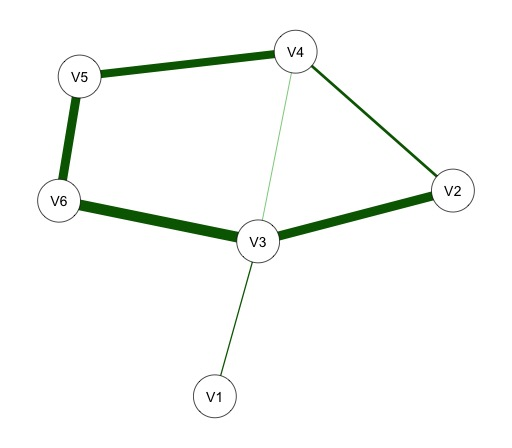

We're in Bop.png


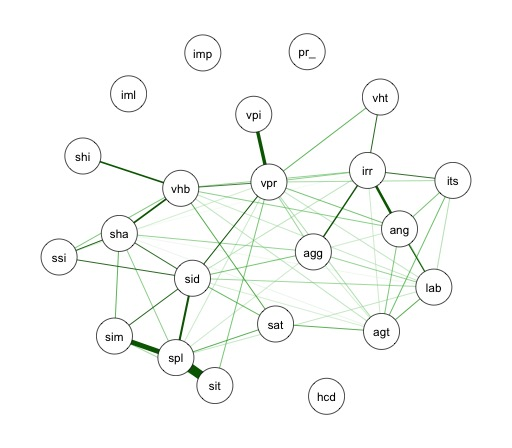

We're in Oba.png


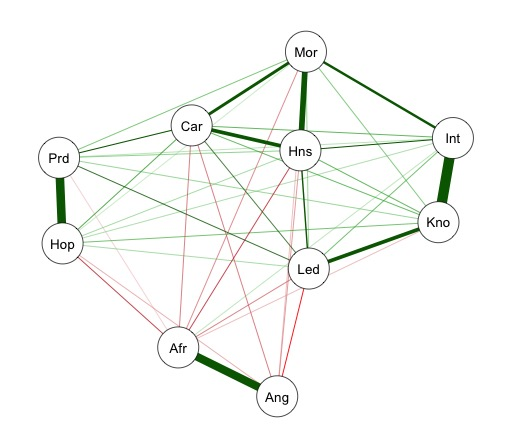

In [9]:
d = {Res: "Res.png", Bop: "Bop.png", Oba: "Oba.png"}
for i in d:
    print("We're in", d[i])
    with grdevices.render_to_bytesio(grdevices.jpeg, width=512, height=448, res=140) as img:
        qgraph_r.qgraph(i.rx2("weiadj"), layout="spring", cut=.8)
    display(Image(data=img.getvalue(), format='jpeg', embed=True))